In [1]:
from time import time

from lagom.algos.goal_selection import SimpleExperiment
from lagom.algos.goal_selection import GoalSelection

algo = GoalSelection()
experiment = SimpleExperiment(num_configs=10)

experiment.add_algo(algo)

start_time = time()
experiment.benchmark(num_process=10)
print(f'\nTotal time: {time() - start_time:.2f} s')

##################################################
# Job ID: 0         
##################################################
##################################################
# Job ID: 1         
##################################################

# Outer Iteration # 1    
##################################################
# Job ID: 2         
##################################################
# Sampled Goal [2, 1]
##################################################
# Job ID: 3         
##################################################

# Outer Iteration # 1    

# Outer Iteration # 1    
##################################################
# Job ID: 4         
##################################################
# Sampled Goal [4, 4]

# Outer Iteration # 1    ##################################################
# Job ID: 5         
##################################################

# Sampled Goal [2, 1]
# Sampled Goal [1, 3]
##################################################
# Job ID: 6    

# Plot learning curves

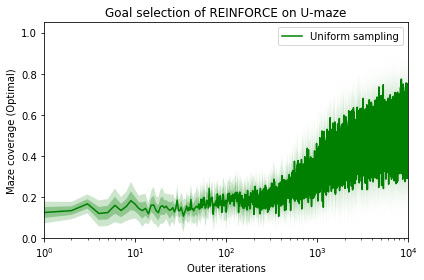

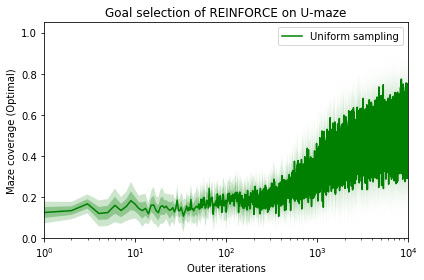

In [4]:
import numpy as np
from lagom.core.plotter import Plotter

from glob import glob  # matching pathnames with patterns

def plotting():
    # Create a plotter
    plotter = Plotter()

    # Needed info
    infos = ['Success rate over goal space']

    for info in infos:
#         list_coverages_linear = []
#         for f in glob('logs/ID_*_eval.npy'):
#             coverages = list(np.load(f).item()[info].values())
#             list_coverages_linear.append(coverages)
            
        list_coverages_uniform = []
        for f in glob('logs/ID_*_eval_uniform.npy'):
            coverages = list(np.load(f).item()[info].values())
            list_coverages_uniform.append(coverages)

#     # Add curve of coverages over different random seeds
#     plotter.add_curve(list_coverages_linear, 
#                       color='red', 
#                       label='[2, 2]->[3, 3]->[4, 4]', 
#                       uncertainty=True, 
#                       scales=[0.5, 1.0], 
#                       alphas=[0.3, 0.2])
    
    plotter.add_curve(list_coverages_uniform, 
                      color='green', 
                      label='Uniform sampling', 
                      uncertainty=True, 
                      scales=[0.5, 1.0], 
                      alphas=[0.3, 0.2])

    title = 'Goal selection of REINFORCE on U-maze'
    xlabel = 'Outer iterations'
    ylabel = 'Maze coverage (Optimal)'
    xlim = [1, 10000]
    ylim = [0, 1.05]
    fig = plotter.plot(title, xlabel, ylabel, xlim=xlim, ylim=ylim, log_x=True, integer_x=False)

    return fig

fig = plotting()
fig.savefig('tmp.png')

fig

# Animation of heatmaps (success coverage)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

from lagom.core.plotter import Plotter

from IPython.display import HTML


fig, ax = plt.subplots(1, 1)

plotter = Plotter()

path = 'logs/ID_0_eval_uniform.npy'
info = 'Average Return over all goals'

goals = [goal for iter_num, goal in np.load(path).item()[info].keys()]
anim_data = list(np.load(path).item()[info].values())
num_data = len(anim_data)

map_size = 4

def animate(i):
    fig.clear()
    
    data = np.array(anim_data[i]).reshape([map_size, map_size])

    ax = plotter.heatmap(data, 
                         vmin=0, 
                         vmax=1, 
                         cmap='YlGnBu', 
                         annot=True, 
                         linewidths=.0, 
                         square=True, 
                         xticklabels=np.arange(1, map_size+1), 
                         yticklabels=np.arange(1, map_size+1))
    
    ax.set_title('Training iteration: {},  goal: {}'.format(i, goals[i]))
    
    ax.add_patch(Rectangle(np.array(goals[i][::-1])-1, 1, 1, fill=False, edgecolor='yellow'))

anim = animation.FuncAnimation(fig, animate, frames=num_data, interval=2000)

anim.save('tmp.gif', writer='imagemagick', fps=.5)

HTML(anim.to_html5_video())